# Análisis videos laboratorio óptica: Cristales líquidos

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
path = '/Users/javier/Documents/university/6th-semester/'+\
       'experimental-physic2/optic-lab/video-analysis/videos/'

cap = cv2.VideoCapture(path+'image_5.avi')  # selección del video
cap2 = cv2.VideoCapture(path+'image_7.avi')

fps = cap.get(cv2.CAP_PROP_FPS)  # frames per second
fps2 = cap2.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # cantidad de frames
frame_count2 = int(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

# Print de la información
print('fps = ' + str(fps))
print('number of frames = ' + str(frame_count))
print('duration (S) = ' + str(duration))
minutes = int(duration/60)
seconds = duration%60
print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))

fps = 11.474
number of frames = 1951
duration (S) = 170.03660449712393
duration (M:S) = 2:50.03660449712393


## Extracción de los datos de los videos

In [3]:
mean_array = np.zeros((3, frame_count))
mean_array2= np.zeros((3, frame_count2))
i = 0
# Abre el video y lo muestra
while(cap.isOpened() or cap2.isOpened()):
  ret, frame = cap.read()
  ret2, frame2 = cap2.read()
  # frame es un numpy array de (1000,1000,3)
  mean_array[0, i] = np.mean(frame[:, :, 0])
  mean_array[1, i] = np.mean(frame[:, :, 1])
  mean_array[2, i] = np.mean(frame[:, :, 2])

  mean_array2[0, i] = np.mean(frame2[:, :, 0])
  mean_array2[1, i] = np.mean(frame2[:, :, 1])
  mean_array2[2, i] = np.mean(frame2[:, :, 2])

  interest_frame = 1500

  if i==interest_frame:
    cv2.imwrite('img/blue-frame'+str(interest_frame)+'.jpg', frame[:, :, 0])
    cv2.imwrite('img/green-frame'+str(interest_frame)+'.jpg', frame[:, :, 1])
    cv2.imwrite('img/red-frame'+str(interest_frame)+'.jpg', frame[:, :, 2])
    print('saved!')
    cv2.imshow('frame', frame)
    cv2.imshow('frame', frame2)
  else:
    cv2.imshow('frame', frame)
    cv2.imshow('frame', frame2)
  i+=1
  if cv2.waitKey(1) & 0xFF == ord('q'):
      # Se puede dejar de correr escribiendo Q
    break

cap.release()
cv2.destroyAllWindows()

saved!


TypeError: 'NoneType' object is not subscriptable

In [8]:
frame_zero = np.where(mean_array[2,:]==np.min(mean_array[2,350:500]))[0][0]
frame_array = np.arange(0, frame_count, 1)
frame_array2 = np.arange(0, frame_count2, 1)

def time(frame):
       """
       Pasa los frames a segundos tomando t=0 cuando se deja pasar
       la luz completamente a la cámara
       """
       return 1/fps*(frame-frame_zero)


def temperature(frame):
       t = time(frame)
       return 10*t/60 + 50

time_array1 = time(frame_array)  # in second
time_array2 = time(frame_array2)
temperature_array1 = temperature(frame_array)  # in celsius
temperature_array2 = temperature(frame_array2)

## Plot subida de temperatura

<ipython-input-9-a90433337ed7>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


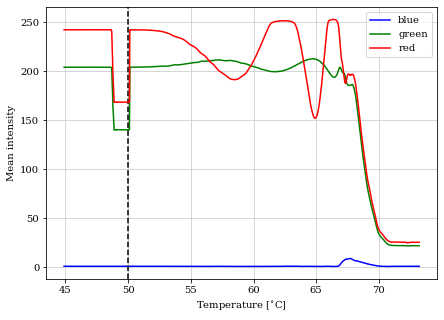

In [9]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 10, "font.family": "serif"})

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(temperature_array1, mean_array[0], color='blue', label='blue')
ax.plot(temperature_array1, mean_array[1], color='green', label='green')
ax.axvline(x=temperature_array1[np.where(mean_array[2,:]==np.min(mean_array[2,350:500]))[0][0]],
           linestyle='--', color='black')
ax.plot(temperature_array1, mean_array[2], color='red', label='red')
ax.legend()
ax.set_xlabel('Temperature [$^{\circ}$C]')
ax.set_ylabel('Mean intensity')
fig.show()

## Plot bajada de temperatura

<ipython-input-43-6a3d6019e7c5>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


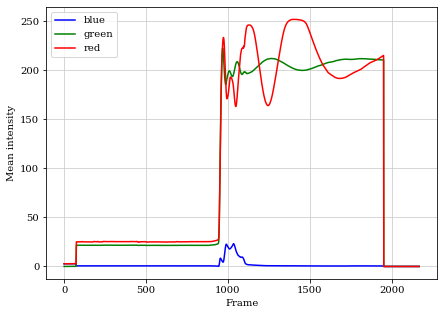

In [43]:
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.plot(frame_array2, mean_array2[0], color='blue', label='blue')
ax2.plot(frame_array2, mean_array2[1], color='green', label='green')
ax2.axvline(x=frame_array2[np.where(mean_array[2,:]==np.min(mean_array[2,350:500]))[0][0]],
           linestyle='--', color='black')
ax2.plot(frame_array2, mean_array2[2], color='red', label='red')
ax2.legend()
ax2.set_xlabel('Frame')
ax2.set_ylabel('Mean intensity')
fig2.show()